In [1]:
from dataloader import *
from model import *
from train_eval_test import *
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import pandas as pd

2024-01-05 14:21:48.570564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-05 14:21:48.768574: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 14:21:51.074647: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.6/lib64:/usr/local/cuda-12.2/lib64
2024-01-05 14:21:51.074764: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

## Load data

In [2]:
solar_data = pd.read_csv('data/solar.csv', header=None).to_numpy()

In [3]:
batch_size = 32
n_train = 36601
n_eval = 5161
n_test = 10417
train_loader, eval_loader, test_loader = get_loaders(solar_data, batch_size, n_train, n_eval, n_test, T=96, S=96)

## Train 

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
#writer = SummaryWriter()

cuda


In [5]:
N = 137 #nb variables
T = 96 #input length (lookback window)
D = 256 # 256 ou 512
S = 96 # 96 ou 192, 336, 720
proj_dim = 128 
num_blocks = 4 #2 ou 3 ou 4 (nombre de block de transformer)

itransformer = iTransformer(N, T, D, S, proj_dim, num_blocks).to(device)
optimizer = torch.optim.Adam(itransformer.parameters(), lr=1e-3) #10−3, 5 × 10−4, 10−4 



In [6]:
loss_values, loss_eval = train(itransformer, optimizer, train_loader, eval_loader, 10, device)

---- epoch :  0
loss train : 0.19622162834909762
loss eval : 0.15604330169466826
---- epoch :  1
loss train : 0.1753354956296081
loss eval : 0.1573879959491583
---- epoch :  2
loss train : 0.16963279255140434
loss eval : 0.1611203633917448
---- epoch :  3
loss train : 0.16680325371964536
loss eval : 0.15410888534134778
---- epoch :  4
loss train : 0.16564493327809135
loss eval : 0.14514815367949316
---- epoch :  5
loss train : 0.1652907800904896
loss eval : 0.14322335253923368
---- epoch :  6
loss train : 0.1639227888339014
loss eval : 0.15864579470302814
---- epoch :  7
loss train : 0.1643145850913596
loss eval : 0.14922954610142952
---- epoch :  8
loss train : 0.16436578603117663
loss eval : 0.14482357983405775
---- epoch :  9
loss train : 0.16222690656021735
loss eval : 0.14517990654955307


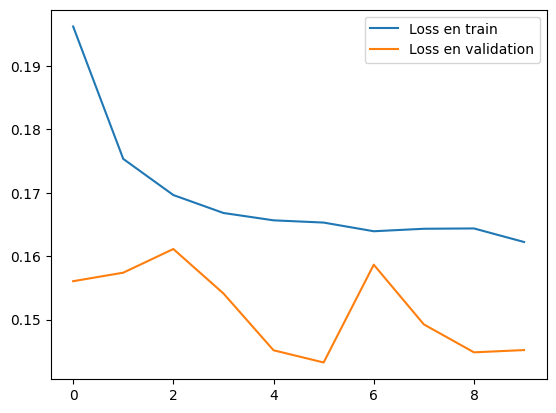

In [7]:
plt.figure()
plt.plot(loss_values,label="Loss en train")
plt.plot(loss_eval,label="Loss en validation")
plt.legend()
plt.show()

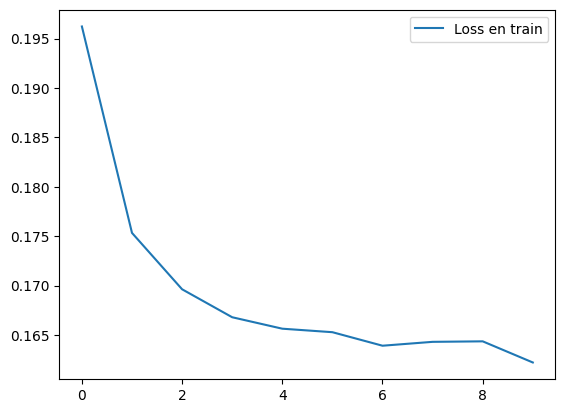

In [8]:
plt.figure()
plt.plot(loss_values,label="Loss en train")
plt.legend()
plt.show()

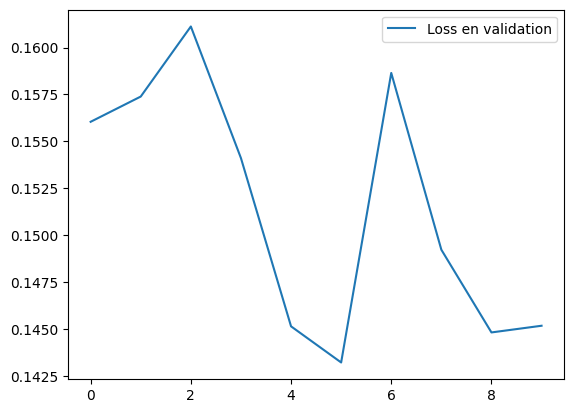

In [9]:
plt.figure()
plt.plot(loss_eval,label="Loss en validation")
plt.legend()
plt.show()

## Test

In [10]:
loss_test, loss_mae, target, yhat = test(itransformer, test_loader, device)
print("MSE : ", loss_test)
print("MAE : ", loss_mae)

MSE :  0.19944629761448596
MAE :  0.2455001226393506


In [11]:
target.shape

torch.Size([19, 96, 137])

Affichage pour une modalité sur toute la durée de la prédiction

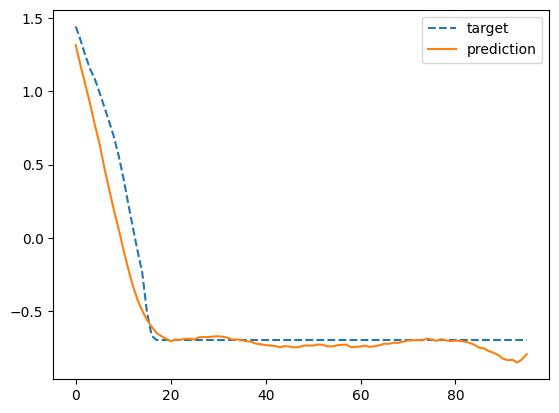

In [28]:
i = 18
plt.figure()
plt.plot(target[0,:,i].to("cpu"),"--", label="target")
plt.plot(yhat[0,:,i].to("cpu"),label="prediction")
plt.legend()
plt.show()


Affichage de toutes les modalités à un instant t

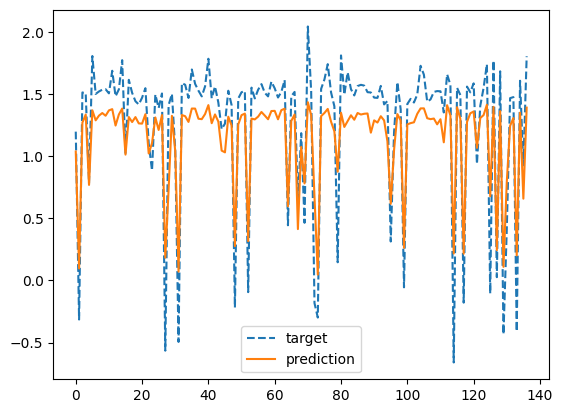

In [31]:

plt.figure()
plt.plot(target[0,0,:].to("cpu"), "--", label="target")
plt.plot(yhat[0,0,:].to("cpu"),label="prediction")
plt.legend()
plt.show()
